# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [111]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [112]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_KEY")

## Load Data

In [113]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [114]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!


to_dwelling_types = to_data.groupby("year").sum()
to_dwelling_types.drop(["average_house_value","shelter_costs_owned","shelter_costs_rented"], axis=1, inplace=True)
to_dwelling_types




,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [115]:
# Save the dataframe as a csv file
to_dwelling_types.to_csv("To Dwelling Types.csv")


In [117]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    fig = plt.figure()
    data = data.plot.bar(color=color)
    plt.title(title,fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    
    plt.show()
    return data
        
#    plot_dwelling_types = data.plot.bar()
#    plot_dwelling_types.set_title(title)
#    plot_dwelling_types.set_xlabel(xlabel)
#    plot_dwelling_types.set_ylabel(ylabel)
#    plot_dwelling_types.set_color(color)
    
#    plt.close(plot_dwelling_types)
#    return pn.pane.Matplotlib(plot_dwelling_types, tight=True)

In [ ]:
#plot_dwelling_types = to_dwelling_types.plot.bar()
#plot_dwelling_types.set_title("Dwelling Types in Toronto")
#plot_dwelling_types.set_xlabel("year")
#plot_dwelling_types.set_ylabel("Dwelling Type Units")

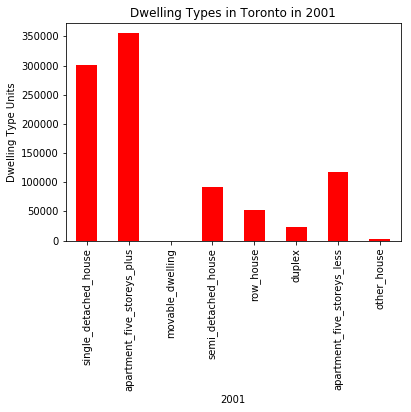

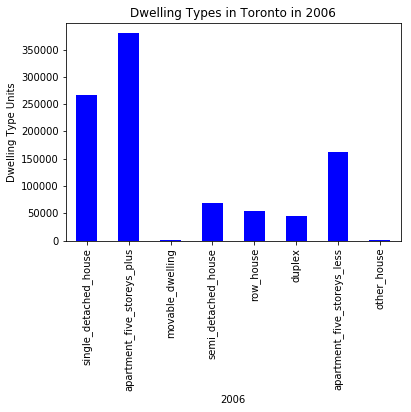

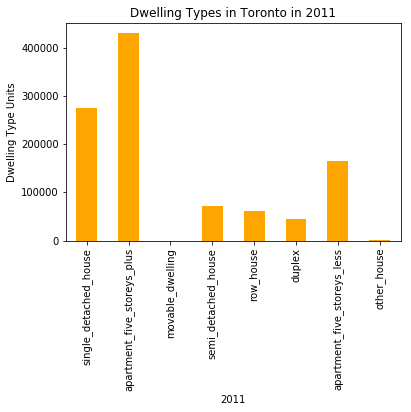

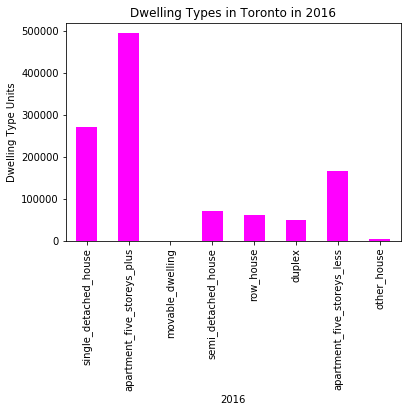

In [118]:
# Create a bar chart per year to show the number of dwelling types

#dwelling_Types_in_toronto_2001 = create_bar_chart(to_dwelling_types.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units","red")
#dwelling_Types_in_toronto_2006 = create_bar_chart(to_dwelling_types.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units","blue")
#dwelling_Types_in_toronto_2011 = create_bar_chart(to_dwelling_types.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units","orange")
#dwelling_Types_in_toronto_2016 = create_bar_chart(to_dwelling_types.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units","magenta")


# Bar chart for 2001                      
create_bar_chart(to_dwelling_types.loc[2001],"Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units","red");


# Bar chart for 2006
create_bar_chart(to_dwelling_types.loc[2006],"Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units","blue");

# Bar chart for 2011
create_bar_chart(to_dwelling_types.loc[2011],"Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units","orange");

# Bar chart for 2016
create_bar_chart(to_dwelling_types.loc[2016],"Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units","magenta");


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [119]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
df_avg_monthly_costs = to_data[["shelter_costs_owned","shelter_costs_rented"]].groupby("year").mean()
df_avg_monthly_costs    

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [120]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = plt.figure()
    data = data.plot.line(color=color)
    plt.title(title,fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    
    plt.show()
    return data
    

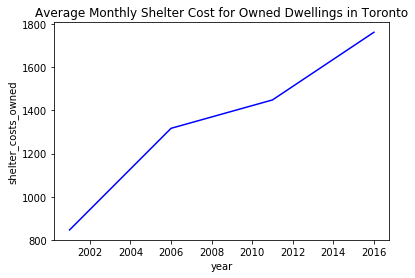

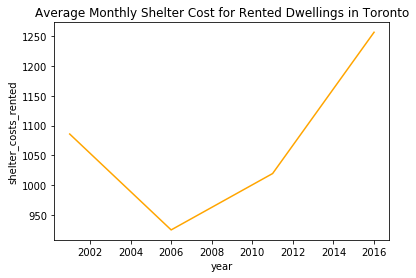

In [121]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(df_avg_monthly_costs.iloc[:,0],"Average Monthly Shelter Cost for Owned Dwellings in Toronto", "year", "shelter_costs_owned", "blue");

# Line chart for rented dwellings
create_line_chart(df_avg_monthly_costs.iloc[:,1],"Average Monthly Shelter Cost for Rented Dwellings in Toronto", "year", "shelter_costs_rented", "orange");


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [122]:
# Calculate the average house value per year
# YOUR CODE HERE!

df_avg_house_value = to_data[["average_house_value"]].groupby("year").mean()
df_avg_house_value

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


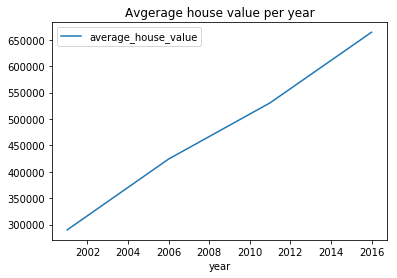

In [73]:
# Plot the average house value per year as a line chart
df_avg_house_value.plot.line(title="Avgerage house value per year");


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [123]:
# Create a new DataFrame with the mean house values by neighbourhood per year

#reset index

df_neighbourhood_index = to_data.reset_index()
df_neighbourhood_index.head()


,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [83]:
# create new data frame

df_avg_value_neighbourhood = df_neighbourhood_index[['year','neighbourhood','average_house_value']]
df_avg_value_neighbourhood.head(10)

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [99]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

df_avg_value_neighbourhood.hvplot(
    x="year", 
    y="average_house_value", 
    groupby= "neighbourhood", 
    yformatter='%.0f'

)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [128]:
# Fetch the data of all dwelling types per year

avg_dwelling_types = to_data.groupby(['year','neighbourhood']).mean()
avg_dwelling_types.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1, inplace= True)
avg_dwelling_types


single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                              3715.0   
     Agincourt South-Malvern West                 3250.0   
     Alderwood                                    3175.0   
     Annex                                        1060.0   
     Banbury-Don Mills                            3615.0   
...                                                  ...   
2016 Wychwood                                      920.0   
     Yonge-Eglinton                               1400.0   
     Yonge-St.Clair                                520.0   
     York University Heights                      1235.0   
     Yorkdale-Glen Park                           2165.0   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                    1480.0   
     Agincourt South-Malvern West                       1835.0   
     Alderwood                                           315.0   
     Annex                                              6090.0   
     Banbury-Don Mills                                  4465.0   
...                                                        ...   
2016 Wychwood                                           1295.0   
     Yonge-Eglinton                                     1995.0   
     Yonge-St.Clair                                     4315.0   
     York University Heights                            5505.0   
     Yorkdale-Glen Park                                 1185.0   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                            0.0               1055.0   
     Agincourt South-Malvern West               0.0                545.0   
     Alderwood                                  0.0                470.0   
     Annex                                      5.0               1980.0   
     Banbury-Don Mills                          0.0                240.0   
...                                             ...                  ...   
2016 Wychwood                                   0.0                880.0   
     Yonge-Eglinton                             0.0                465.0   
     Yonge-St.Clair                             0.0                450.0   
     York University Heights                    0.0               1360.0   
     Yorkdale-Glen Park                         0.0                 80.0   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                  1295.0   195.0   
     Agincourt South-Malvern West      455.0   105.0   
     Alderwood                          50.0   185.0   
     Annex                             605.0   275.0   
     Banbury-Don Mills                 380.0    15.0   
...                                      ...     ...   
2016 Wychwood                          290.0   395.0   
     Yonge-Eglinton                     60.0   310.0   
     Yonge-St.Clair                    220.0   130.0   
     York University Heights           775.0   280.0   
     Yorkdale-Glen Park                600.0   465.0   

                                   apartment_five_storeys_less  other_house  
year neighbourhood                                                           
2001 Agincourt North                                     185.0          5.0  
     Agincourt South-Malvern West                        425.0          0.0  
     Alderwood                                           370.0          0.0  
     Annex                                              3710.0        165.0  
     Banbury-Don Mills                                  1360.0          0.0  
...                                                        ...          ...  
2016 Wychwood                                        

In [129]:
avg_dwelling_types = avg_dwelling_types.reset_index()
avg_dwelling_types


,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715.0,1480.0,0.0,1055.0,1295.0,195.0,185.0,5.0
1,2001,Agincourt South-Malvern West,3250.0,1835.0,0.0,545.0,455.0,105.0,425.0,0.0
2,2001,Alderwood,3175.0,315.0,0.0,470.0,50.0,185.0,370.0,0.0
3,2001,Annex,1060.0,6090.0,5.0,1980.0,605.0,275.0,3710.0,165.0
4,2001,Banbury-Don Mills,3615.0,4465.0,0.0,240.0,380.0,15.0,1360.0,0.0
...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920.0,1295.0,0.0,880.0,290.0,395.0,2080.0,35.0
556,2016,Yonge-Eglinton,1400.0,1995.0,0.0,465.0,60.0,310.0,1445.0,0.0
557,2016,Yonge-St.Clair,520.0,4315.0,0.0,450.0,220.0,130.0,1370.0,0.0
558,2016,York University Heights,1235.0,5505.0,0.0,1360.0,775.0,280.0,995.0,0.0


In [133]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

avg_dwelling_types.hvplot.bar(
    x='year', 
    groupby='neighbourhood', 
    rot=90, 
    height=500, 
    xlabel='Year', 
    ylabel='Dwelling Type Units'

)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [149]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

#top_10_neighbourhoods = to_data.sort_values("average_house_value", ascending=False).head(10)
#top_10_neighbourhoods

top_10_neighbourhoods = to_data.groupby(by='neighbourhood').mean()
top_10_neighbourhoods = top_10_neighbourhoods.nlargest(10, columns='average_house_value')
top_10_neighbourhoods


,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [150]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

top_10_neighbourhoods.hvplot.bar(
    x="neighbourhood", 
    y="average_house_value", 
    rot=90, 
    height=600, 
    width=600,
    xlabel="Neighbourhood", 
    ylabel="Avg. House value", 
    yformatter="$%.0f", 
    title="Top 10 most expensive neighbourhoods in Toronto"

)



:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [151]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [154]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
avg_neighbourhood_value = to_data.groupby("neighbourhood").mean().reset_index()
avg_neighbourhood_value.head()





,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [ ]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [ ]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [ ]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [ ]:
# Create the sunburst chart
# YOUR CODE HERE!